# Digital Control in the frequency domain

The example **controller** transfer function

$$
G_{c}(s) = \frac{s + 1}{s + 2} = \frac{s}{s + 2} + \frac{1}{s + 2}
$$

is transfered to the time domain with the [inverse Laplace transform](https://en.wikipedia.org/wiki/Laplace_transform#Table_of_selected_Laplace_transforms) as

$$
\mathcal{L}^{-1} \left\{\frac{G(s)}{s} \right\} = \mathcal{L}^{-1} \left\{ \frac{1}{s + 2} + \frac{1}{2} \frac{2}{s~(s + 2)} \right\} = \frac{1}{2} \left[1 + \exp(-2~t) \right] = h(t) \quad  \text{(step response).}
$$

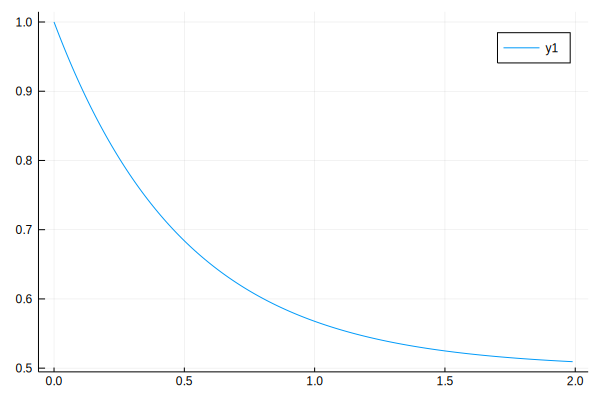

In [2]:
N = 200;    # Number of time steps
Ts = 0.01;  # Sampling time
t = 0:Ts :Ts*(N-1);      # Time
y = 0.5*(1 .+ exp.(-2*t)); # Output

using Plots;
plot(t, y)

## Z-Transform

The Z-transform is applyied on the time-continuous step response to yield

$$
\mathcal{Z} \left\{ \frac{1}{2} \left[1 + \exp(-2~t) \right]_{t = n~T}\right\} = \frac{1}{2} \left( \frac{z}{z - 1} + \frac{z}{z - \exp\left(-2T\right)} \right) = \frac{z - 0.5~\left(1 + \exp(-2T)\right)}{z - \exp(-2T)} = \frac{Y(z)}{X(z)}
$$

and the resulting discrete transfer function is noted as

$$
G_{c,d}(z) = \frac{Y(z)}{X(z)} = \frac{1 - 0.5~\left(1 + \exp(-2T)\right) z^{-1} }{1 - \exp(-2T)  z^{-1}} \text{.}
$$

### Control algorithm

The discrete transfer function is rewritten as

$$
    Y(z) \left[ 1 - \exp(-2T)  z^{-1} \right] = X(z) \left[ 1 - 0.5~\left(1 + \exp(-2T)\right) z^{-1}\right]
$$

and the inverse Z-Transform is applied to gain the algorithm

$$
 y_{n} = \exp(-2T) y_{n-1} + x_{n} -  0.5~\left(1 + \exp(-2T)\right) x_{n-1} \text{.}
$$


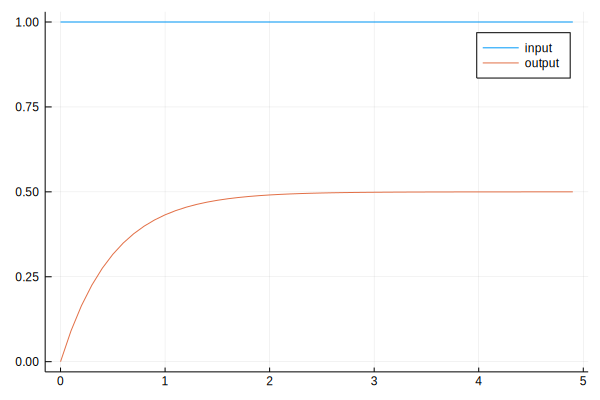

In [4]:
N = 50; # Number of time steps
Ts = 0.1; # Sampling time

x = ones(N); # Input of controller
y = zeros(N); # Output of controller

for i = 1 : N-1
    y[i+1] = exp(-2*Ts)*y[i] + x[i+1] - 0.5*(1 + exp(-2*Ts))*x[i]
end


tspan = 0 : Ts : Ts * (N-1);

using Plots;
plot(tspan, x, label="input")
plot!(tspan, y, label="output")


$$
z = e^{s~T}
$$

$$
s T = \ln( z ) \quad s = \frac{1}{T} \ln(z)
$$

## Tustin's method

The [Tustin transform](https://en.wikipedia.org/wiki/Bilinear_transform) uses the approximation

$$
s \approx \frac{2}{T} \frac{z - 1}{z + 1}
$$

to transfer the transfer function from the continuous frequency domain directly to the discrete frequency domain as 

$$
\tilde{G}_{c}(z) = \left. G_{c}(s) \right\rvert_{s =  \frac{2}{T} \frac{z - 1}{z + 1}} = \frac{\frac{2}{T} \frac{z - 1}{z + 1} + 1}{\frac{2}{T} \frac{z - 1}{z + 1} + 2} = \cdots = \frac{ \frac{21}{22} - \frac{19}{22} z^{-1} }{ 1 - \frac{9}{11} z^{-1} } = \frac{\tilde{Y}(z)}{\tilde{X}(z)}
$$

with $ T = 0.1 $ seconds.

### Control algorithm

The control algorithm is derived from the discrete transfer function using the inverse Z-Transform to yield

$$
y_{n} = \frac{9}{11} y_{n-1} + \frac{21}{22} x_{n} - \frac{19}{22} x_{n-1} \text{.}
$$


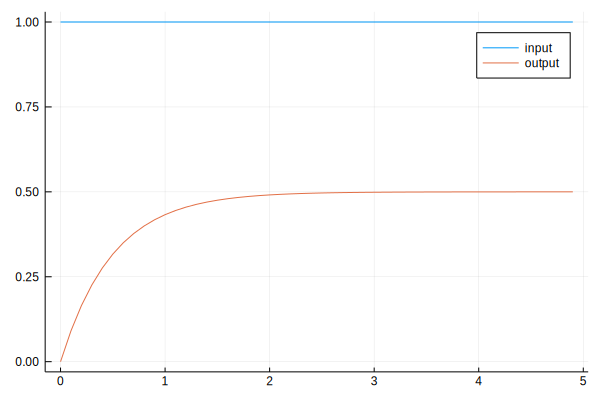

In [6]:
N = 50; # Number of time steps
Ts = 0.1; # Sampling time

x = ones(N); # Input of controller
y = zeros(N); # Output of controller

for i = 1 : N-1
    y[i+1] = (9/11)*y[i] + (21/22)*x[i+1] - (19/22)*x[i]
end


tspan = 0 : Ts : Ts * (N-1);

using Plots;
plot(tspan, x, label="input")
plot!(tspan, y, label="output")